# **Mini Projet N°1 : Les arbres de décision**

## ***Méthode 1 : Implémentation à l’aide des librairies***

### **Bibs import**

In [68]:
# Importer les bibliothèques
import pandas as pd
import math
import numpy as np
import time as t
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, classification_report

from sklearn import metrics
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### **1. Charger et Prétraiter le Dataset**

#### **Read the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/data mining/heart_disease_uci.csv'

Mounted at /content/drive


In [5]:
# Charger le dataset
df = pd.read_csv(file_path)

#### **EDA de notre dataset**

In [6]:
# la dimension de notre dataset
print('le nombre de colonne est : ',df.shape[1])
print('le nombre de ligne est : ',df.shape[0])

le nombre de colonne est :  16
le nombre de ligne est :  920


In [7]:
# Afficher les premières lignes du dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
# savoir les infos de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
#description des colonnes numériques du notre dataset
df=  df.drop(['id'], axis=1)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
num,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0


In [10]:
# les valeurs uniques de chaque variables catégorielles
for i in df.columns :
  if df[i].dtype == 'object' or df[i].dtype == 'category' :
    print("les valeurs unique de ",i," sont : ",df[i].unique())

les valeurs unique de  sex  sont :  ['Male' 'Female']
les valeurs unique de  dataset  sont :  ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
les valeurs unique de  cp  sont :  ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
les valeurs unique de  fbs  sont :  [True False nan]
les valeurs unique de  restecg  sont :  ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
les valeurs unique de  exang  sont :  [False True nan]
les valeurs unique de  slope  sont :  ['downsloping' 'flat' 'upsloping' nan]
les valeurs unique de  thal  sont :  ['fixed defect' 'normal' 'reversable defect' nan]


#### **Data vis**

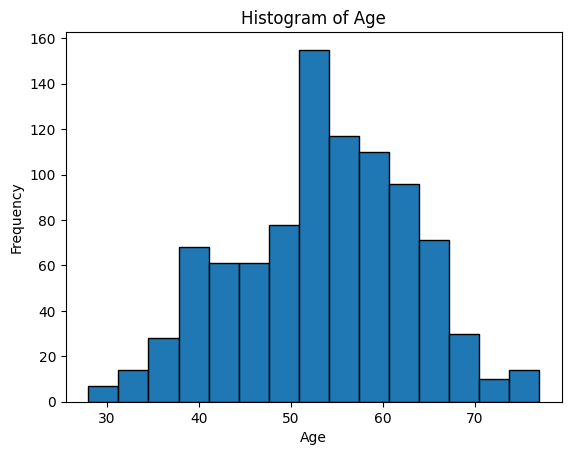

In [11]:
#plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=15, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

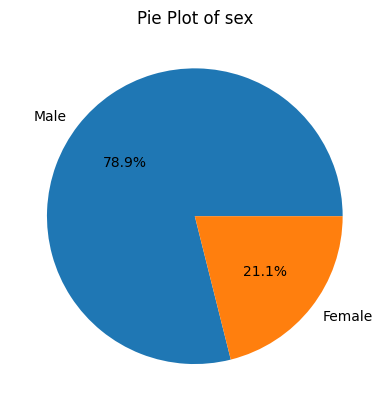

sex
Male      726
Female    194
Name: count, dtype: int64


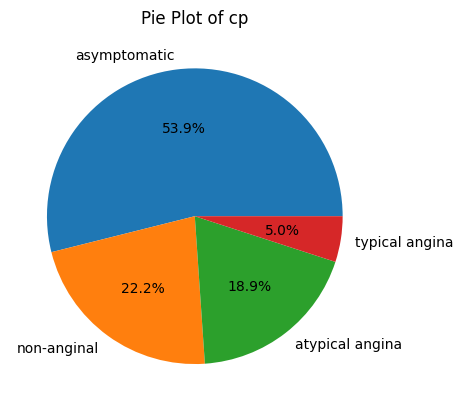

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


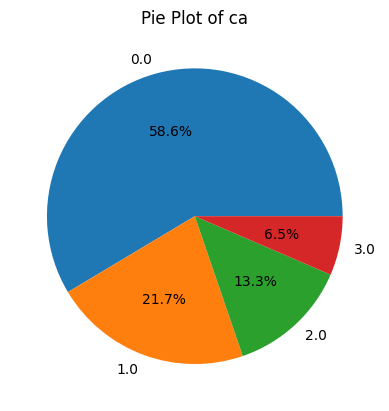

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64


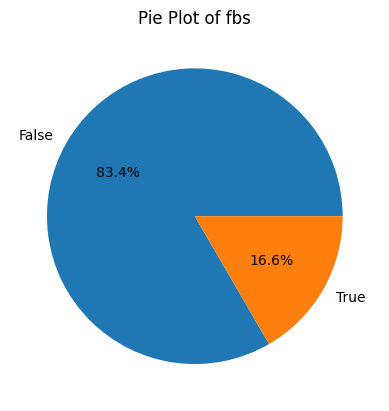

fbs
False    692
True     138
Name: count, dtype: int64


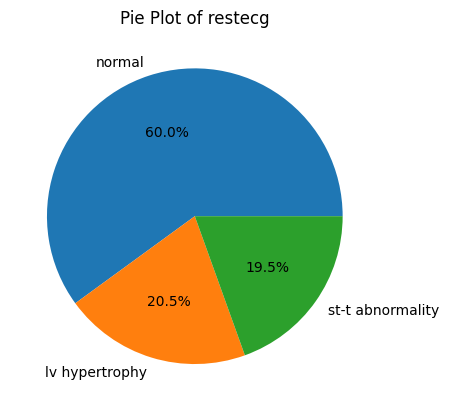

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


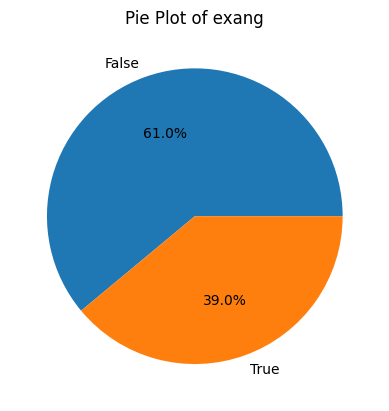

exang
False    528
True     337
Name: count, dtype: int64


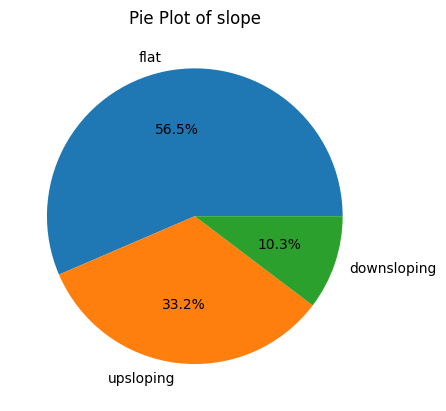

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


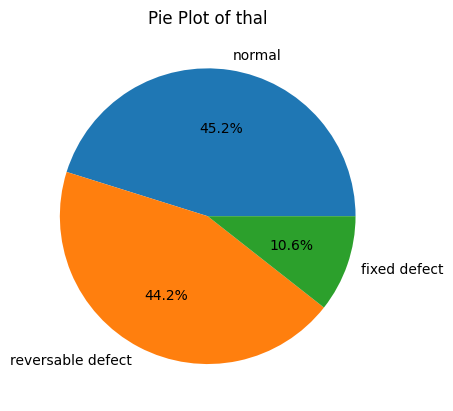

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


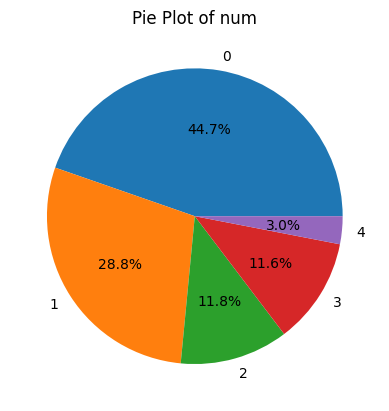

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [12]:
columns_to_plot = ['sex', 'cp', 'ca','fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

for column in columns_to_plot:
    df[column].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Plot of {column}')
    plt.ylabel('')  # Remove the y-axis label
    plt.show()
    print(df[column].value_counts())

#### **Gestion des valeurs manquates**

In [13]:
# savoir le nombre de lignes nulles
df.isnull().sum().sort_values(ascending=False).to_frame().T

,ca,thal,slope,fbs,oldpeak,trestbps,thalch,exang,chol,restecg,age,sex,dataset,cp,num
0,611,486,309,90,62,59,55,55,30,2,0,0,0,0,0


In [14]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
print(f'les colonnes catégorielles : {cat_cols}')
print(f'les colonnnes numériques: {Num_cols}')

les colonnes catégorielles : ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
les colonnnes numériques: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [15]:
# FInd columns
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [16]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [17]:
def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()


    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [18]:
# impute missing values
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

for col in missing_data_cols:
    print("Les valeurs manquantes de la colonne \"", col, "\" est :", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
        print("--"*60)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
        print("--"*60)
    else:
        pass

Les valeurs manquantes de la colonne " trestbps " est : 6.41%
MAE = 13.145838150289018 

RMSE = 16.972665698848118 

R2 = 0.1005481659470373 

------------------------------------------------------------------------------------------------------------------------
Les valeurs manquantes de la colonne " chol " est : 3.26%
MAE = 52.95269662921349 

RMSE = 76.34709850781363 

R2 = 0.5382533863597166 

------------------------------------------------------------------------------------------------------------------------
Les valeurs manquantes de la colonne " fbs " est : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

------------------------------------------------------------------------------------------------------------------------
Les valeurs manquantes de la colonne " restecg " est : 0.22%
The feature 'restecg' has been imputed with 61.96 accuracy

------------------------------------------------------------------------------------------------------------------------
Le

In [19]:
df.isnull().sum().sort_values(ascending=False).to_frame().T

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df.duplicated().sum()

2

In [21]:
# drop duplicates
df=df.drop_duplicates()
print(df.duplicated().sum())
print("la dimension de notre dataset après nettoyage est :",df.shape)

0
la dimension de notre dataset après nettoyage est : (918, 15)


#### **Détection des outliers en utilisant l'IQR**

In [29]:
# Détection des outliers en utilisant l'IQR
def detect_outliers(df, numerical_cols):
  for col in numerical_cols:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      if outliers.empty:
          print(f'Pas d\'outliers dans la colonne "{col}"')
      else:
        print(f'le nombre d\'Outliers dans la colonne "{col}" est : {outliers.shape[0]} :')
        #print(outliers)
        print('--'*60)
detect_outliers(df, numerical_cols)

Pas d'outliers dans la colonne "oldpeak"
Pas d'outliers dans la colonne "thalch"
le nombre d'Outliers dans la colonne "chol" est : 39 :
------------------------------------------------------------------------------------------------------------------------
Pas d'outliers dans la colonne "trestbps"
Pas d'outliers dans la colonne "age"


#### **Remplacement des outilers avec la mediane**

In [32]:
# Imputation avec la médiane
for col in numerical_cols:
    median = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])


In [33]:
# Détection des outliers après Imputation
detect_outliers(df, numerical_cols)

Pas d'outliers dans la colonne "oldpeak"
Pas d'outliers dans la colonne "thalch"
le nombre d'Outliers dans la colonne "chol" est : 28 :
------------------------------------------------------------------------------------------------------------------------
Pas d'outliers dans la colonne "trestbps"
Pas d'outliers dans la colonne "age"


#### **Encodage des variables catégorielles**

In [34]:
# Encoder les variables catégorielles
Label_Encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = Label_Encoder.fit_transform(df[col])
    else:
        pass

In [36]:
df.sample(5)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
653,56.0,1,2,2,125.0,225.0,0,1,98.0,0,-2.0,1,1.0,2,2
631,51.0,1,2,0,140.0,225.0,0,1,138.0,0,0.0,1,1.0,1,2
475,57.0,0,1,0,130.0,225.0,0,2,126.0,1,0.8,1,0.0,1,0
486,60.0,1,1,2,120.0,246.0,0,0,135.0,0,0.0,2,0.0,1,0
720,63.0,1,3,0,140.0,260.0,0,2,112.0,1,3.0,1,1.0,2,2


### **2. Construire un Arbre de Décision**

#### **Separate data into train and test and normalise it**

In [104]:
# Séparation des features (X) et de la variable cible (y)
X = df.drop('num', axis=1)
y = df['num']

# Normalisation des features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Division du dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### **DT model build**

In [50]:
# Initialiser un modèle d'arbre de décision avec des hyperparamètres basiques
model = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42,min_samples_split= 30)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=30, random_state=42)

**Paramètres clés :**

. max_depth : Limite la profondeur de l'arbre pour éviter l'overfitting.

. criterion : Définit la fonction à utiliser pour mesurer la qualité de la division (gini ou entropy).

. min_samples_split : Nombre minimum d'échantillons nécessaires pour diviser un nœud.

### **3. Évaluer le Modèle**


Train Accuracy: 0.7029972752043597
Test Accuracy: 0.592391304347826
------------------------------------------------------------------------------------------------------------------------
Rapport de classification :
              precision    recall  f1-score   support

           0       0.72      0.86      0.79        73
           1       0.53      0.56      0.55        62
           2       0.23      0.14      0.17        22
           3       0.44      0.36      0.40        22
           4       0.00      0.00      0.00         5

    accuracy                           0.59       184
   macro avg       0.39      0.39      0.38       184
weighted avg       0.55      0.59      0.57       184

------------------------------------------------------------------------------------------------------------------------
Matrice de confusion :
[[63  7  3  0  0]
 [20 35  1  6  0]
 [ 4 12  3  3  0]
 [ 0  8  6  8  0]
 [ 0  4  0  1  0]]


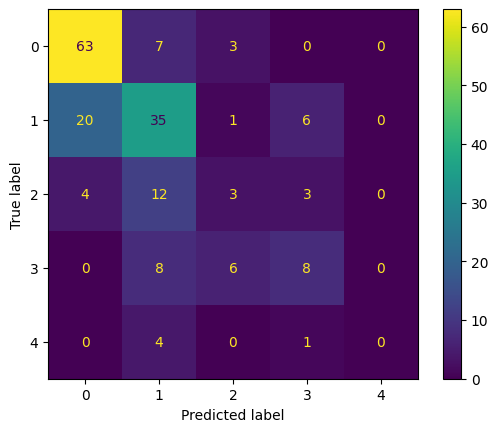

In [43]:
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Prédire pour l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


print("--"*60)

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
print("--"*60)

# Matrice de confusion
print("Matrice de confusion :")
print(metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2, 3,4])

cm_display.plot()
plt.show()

**Choix des métriques :**

. Accuracy : Pourcentage de prédictions correctes.

. Classification Report : Fournit des informations sur la précision, le rappel, et le score F1.

. Confusion Matrix : Permet de voir les faux positifs et faux négatifs.

### **4. Optimiser les Hyperparamètres**

#### **Grid search for best params avec GridSerachCV**

In [44]:
s = t.time()
# Définir les hyperparamètres à tester

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5,10,15, 20,25,30,35,40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None,'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

# Appliquer GridSearchCV pour trouver la meilleure configuration
"""
StratifiedKFold : Assure que chaque pli contient à peu près la même proportion de chaque classe,
 ce qui est particulièrement utile pour les jeux de données déséquilibrés.
 """
cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_accuracy = best_model.score(X_test, y_test)

print(f"Best parameters: {best_params}")
print(f"Accuracy for best parameters: {best_accuracy:.4f}")

elapsed_time = t.time()-s
minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"le temps ecoulé pour ce calcul est : {minutes} minutes, {seconds:.2f} secondes")

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Accuracy for best parameters: 0.5435
le temps ecoulé pour ce calcul est : 2 minutes, 52.79 secondes


Training score : 0.7002724795640327
Testing score : 0.5434782608695652
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        73
           1       0.50      0.39      0.44        62
           2       0.38      0.23      0.29        22
           3       0.40      0.36      0.38        22
           4       0.00      0.00      0.00         5

    accuracy                           0.54       184
   macro avg       0.39      0.37      0.37       184
weighted avg       0.53      0.54      0.53       184

Matrice de confusion :
[[63  7  2  1  0]
 [23 24  3  8  4]
 [ 4  9  5  2  2]
 [ 3  6  2  8  3]
 [ 1  2  1  1  0]]


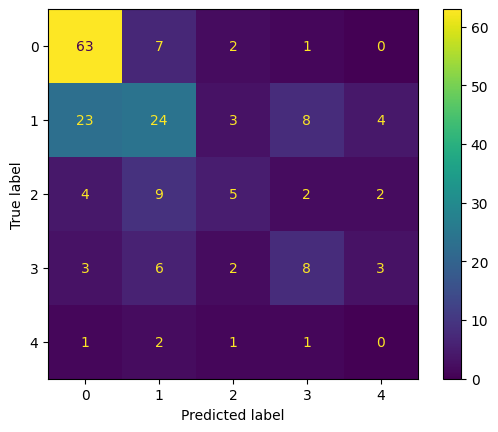

In [46]:
# Entraîner le modèle sur les données avec ces nouveaux params
best_model.fit(X_train, y_train)
# Prédire sur l'ensemble de test
y_pred1 = best_model.predict(X_test)

# Calculer la précision
trs=best_model.score(X_train,y_train)
tss=best_model.score(X_test,y_test)

print("Training score :",trs)
print("Testing score :",tss)

# Rapport de classification
print(classification_report(y_test, y_pred1))

# Matrice de confusion
print("Matrice de confusion :")
print(metrics.confusion_matrix(y_test, y_pred1))
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=[0, 1, 2, 3,4])

cm_display.plot()
plt.show()

**Alors les best paramètres sont : criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 8, 'min_samples_split': 20**

#### **Choose of the best scaler**

In [47]:
# Choix des scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Tester chaque scaler
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    model = DecisionTreeClassifier(**best_params)  # Avec les meilleurs paramètres trouvés
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{scaler_name} - Cross-validated accuracy: {scores.mean():.4f}")


MinMaxScaler - Cross-validated accuracy: 0.5096
StandardScaler - Cross-validated accuracy: 0.5173
RobustScaler - Cross-validated accuracy: 0.4759


**Donc le best scaling est : MinMaxScaler()**

### **5. Expliquer les Résultats**


#### **Plot de l'arbre de décision**

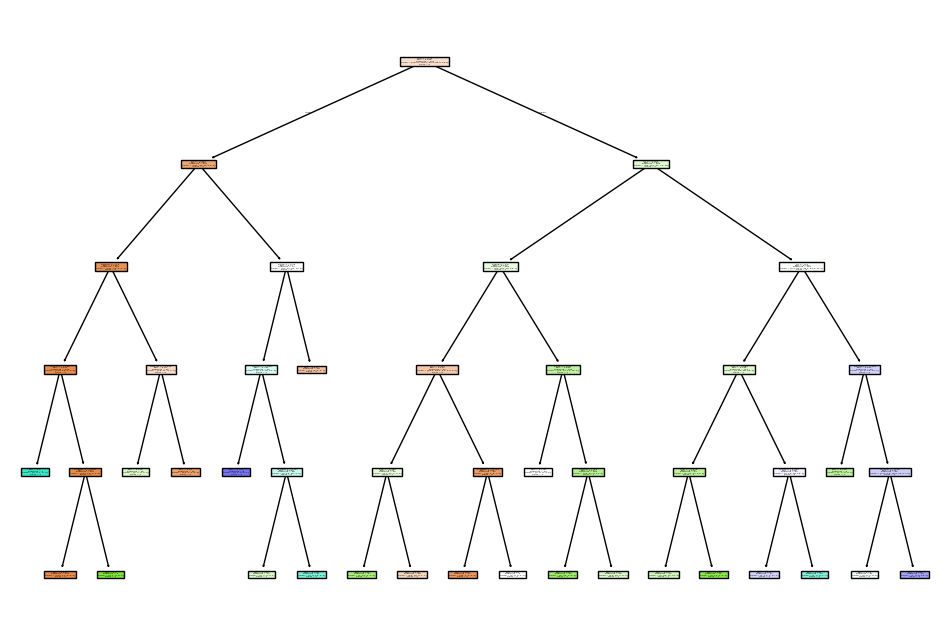

In [51]:
# Visualiser l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0','1', '2', '3', '4'])
plt.savefig('decision_tree.png')
plt.show()



#### **Les variables importantes**

In [54]:
# Importance des caractéristiques
importances = best_model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: age, Importance: 0.06344980633518568
Feature: sex, Importance: 0.009942175133709302
Feature: dataset, Importance: 0.09099815321722049
Feature: cp, Importance: 0.05419600494745693
Feature: trestbps, Importance: 0.054228664876358273
Feature: chol, Importance: 0.02873427587072439
Feature: fbs, Importance: 0.004758207726244192
Feature: restecg, Importance: 0.03305664124566564
Feature: thalch, Importance: 0.045614800263799646
Feature: exang, Importance: 0.009930895334170197
Feature: oldpeak, Importance: 0.10511525909128694
Feature: slope, Importance: 0.0016928308925276338
Feature: ca, Importance: 0.19231523297250153
Feature: thal, Importance: 0.3059670520931492


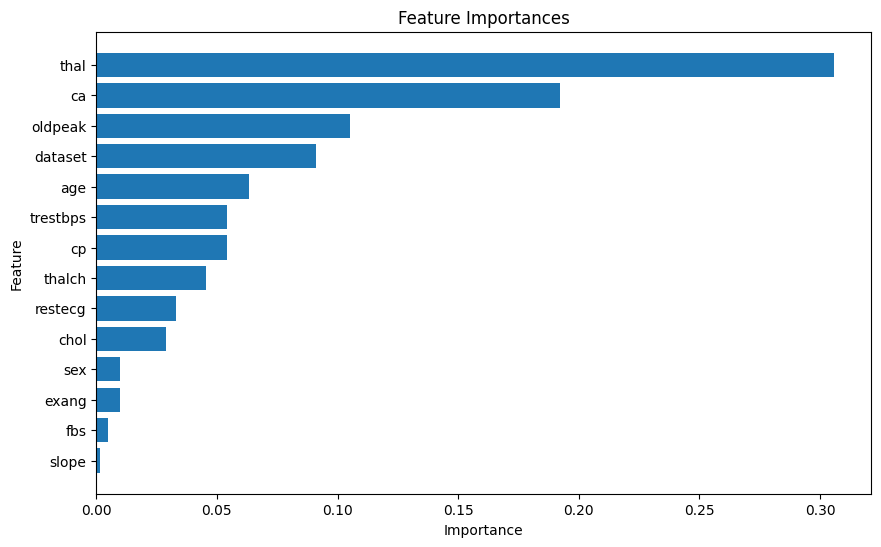

In [56]:
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

#### **Retrain the model with the importants features and the best params**

In [64]:
"""
# Convertir X_train et X_test en DataFrames avec les noms de colonnes appropriés
X_train_df = pd.DataFrame(X_train, columns=['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_test_df = pd.DataFrame(X_test, columns=['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
"""
# Sélectionner uniquement les caractéristiques importantes
important_features = feature_importances[feature_importances['Importance'] > 0]['Feature'].tolist()
column_indices = [df.columns.get_loc(col) for col in important_features]

# Utilisez les indices pour sélectionner les colonnes dans les tableaux NumPy
X_train_selected = X_train[:, column_indices]
X_test_selected = X_test[:, column_indices]


# Réentraîner le modèle en utilisant les caractéristiques sélectionnées
grid_search.fit(X_train_selected, y_train)
best_params2 = grid_search.best_params_
best_model2 = grid_search.best_estimator_
best_accuracy2 = best_model2.score(X_test_selected, y_test)

print(f"Best parameters with selected features: {best_params2}")
print(f"Accuracy with selected features: {best_accuracy2:.4f}")


Best parameters with selected features: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 6, 'min_samples_split': 20}
Accuracy with selected features: 0.5707


#### **Grid search for best params avec RandomizedSerachCV**

In [65]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5,10,15, 20,25,30,35,40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None,'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

In [66]:
# Créer l'objet RandomizedSearchCV
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=parameters, cv=cv, verbose=False)
DT_grid.fit(X_train, y_train)

#best_dt = DT_grid.best_estimator_

# Afficher les meilleurs hyperparamètres
print(f"Best parameters: {DT_grid.best_params_}")

# Créer un nouveau modèle avec des hyperparamètres spécifiques
dt = DecisionTreeClassifier(**DT_grid.best_params_)

# Ajuster ce modèle avec les données d'entraînement
dt.fit(X_train, y_train)

Best parameters: {'min_samples_split': 20, 'min_samples_leaf': 4, 'max_leaf_nodes': 40, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}


DecisionTreeClassifier(max_depth=30, max_leaf_nodes=40, min_samples_leaf=4,
                       min_samples_split=20)

In [67]:
trs=dt.score(X_train,y_train)
tss=dt.score(X_test,y_test)

print("Training score :",trs)
print("Testing score :",tss)

Training score : 0.7561307901907357
Testing score : 0.5217391304347826


## ***Méthode 2 : Implémentation manuelle***

# **1. Calcul du Gain d'Entropie**


## **a. Fonction d'Entropie**


In [110]:
def entropy(data, num_bins=10):
    n = len(data)
    if n == 0:
        return 0

    # Calcul des valeurs uniques et de leurs comptes
    unique_values, counts = np.unique(data, return_counts=True)

    # Déterminer si la variable est discrète ou continue
    if len(unique_values) / n < 0.1:  # Par exemple, si moins de 10% des valeurs sont uniques
        # Cas des variables discrètes
        prob = counts / n
        return -np.sum(prob * np.log2(prob))
    else:
        # Cas des variables continues
        hist, _ = np.histogram(data, bins=num_bins)
        hist = hist[hist > 0]  # Eliminer les zéros pour le calcul de probabilité
        prob = hist / np.sum(hist) # Normaliser l'histogramme pour obtenir des probabilités
        return -np.sum(prob * np.log2(prob)) # Calculer l'entropie

## **b. Fonction de Gain d'Information**


In [111]:
def information_gain(y, x, num_bins=10):
    # Entropie avant la division
    initial_entropy = entropy(y)

    # Calculer les valeurs uniques et leurs indices
    unique_values, counts = np.unique(x, return_counts=True)
    weighted_entropy = 0.0

    # Déterminer si x est discret ou continu
    if len(unique_values) / len(x) >= 0.1:  # Si x est continu
        # Discrétisation de x
        hist, bin_edges = np.histogram(x, bins=num_bins)
        for i in range(len(bin_edges) - 1):
            mask = (x >= bin_edges[i]) & (x < bin_edges[i + 1])
            subset = y[mask]
            weighted_entropy += (np.sum(mask) / len(x)) * entropy(subset) #Calculer l'entropie pondérée

    else:
        # Cas des variables discrètes
        for v, count in zip(unique_values, counts):
            subset = y[x == v]  # Sous-ensemble de y correspondant à la valeur v
            weighted_entropy += (count / len(x)) * entropy(subset) #Calculer l'entropie pondérée

    return initial_entropy - weighted_entropy #Retourner le gain d'information

# **2. Sélection du Meilleur Attribut**


In [112]:
def best_attribute(X, y):
    best_gain = -1
    best_attr = -1

    for i in range(X.shape[1]):  # Pour chaque attribut
        gain = information_gain(y, X[:, i])  # Calculer le gain d'information
        if gain > best_gain:
            best_gain = gain
            best_attr = i
    return best_attr

# **3. Construction Récursive de l'Arbre /4. Arrêt de la Construction**




In [93]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        # Conditions d'arrêt
        if len(set(y)) == 1:  # Si toutes les étiquettes sont les mêmes
            return y[0]
        if len(y) < self.min_samples_split:  # Si le nombre d'échantillons est inférieur au seuil
            return np.bincount(y).argmax()  # Retourner la classe majoritaire
        if self.max_depth is not None and depth >= self.max_depth:
            return np.bincount(y).argmax()  # Retourner la classe majoritaire

        # Sélectionner le meilleur attribut
        best_attr = best_attribute(X, y)
        tree = {best_attr: {}}

        # Diviser les données selon le meilleur attribut
        unique_values = np.unique(X[:, best_attr])

        # Vérification du type d'attribut (discret ou continu)
        if len(unique_values) / len(y) < 0.1:  # Si discret
            for value in unique_values:
                subset_indices = X[:, best_attr] == value
                subset_X = X[subset_indices]
                subset_y = y[subset_indices]
                tree[best_attr][value] = self.fit(subset_X, subset_y, depth + 1)
        else:  # Si continu
            # Discrétisation des valeurs continues pour la construction de l'arbre
            bin_edges = np.linspace(np.min(unique_values), np.max(unique_values), num=5)  # Exemple avec 5 bins
            for i in range(len(bin_edges) - 1):
                mask = (X[:, best_attr] >= bin_edges[i]) & (X[:, best_attr] < bin_edges[i + 1])
                subset_X = X[mask]
                subset_y = y[mask]
                if len(subset_y) > 0:  # Assurer que le sous-ensemble n'est pas vide
                    # Stocker l'intervalle comme un tuple
                    interval = (bin_edges[i], bin_edges[i + 1])
                    tree[best_attr][interval] = self.fit(subset_X, subset_y, depth + 1)

        self.tree = tree
        return tree


In [113]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        # Conditions d'arrêt
        if len(set(y)) == 1:  # Si toutes les étiquettes sont les mêmes
            return y[0]
        if len(y) < self.min_samples_split:  # Si le nombre d'échantillons est inférieur au seuil
            return np.bincount(y).argmax()  # Retourner la classe majoritaire
        if self.max_depth is not None and depth >= self.max_depth:
            return np.bincount(y).argmax()  # Retourner la classe majoritaire

        # Sélectionner le meilleur attribut
        best_attr = best_attribute(X, y)

        # Vérifier si best_attr est valide
        if best_attr == -1:
            return np.bincount(y).argmax()  # Retourner la classe majoritaire si aucun attribut n'est trouvé

        tree = {best_attr: {}}

        # Diviser les données selon le meilleur attribut
        unique_values = np.unique(X[:, best_attr])

        # Vérification du type d'attribut (discret ou continu)
        if len(unique_values) / len(y) < 0.1:  # Si discret
            for value in unique_values:
                subset_indices = X[:, best_attr] == value
                subset_X = X[subset_indices]
                subset_y = y[subset_indices]
                tree[best_attr][value] = self.fit(subset_X, subset_y, depth + 1)
        else:  # Si continu
            # Discrétisation des valeurs continues pour la construction de l'arbre
            bin_edges = np.linspace(np.min(unique_values), np.max(unique_values), num=5)  # Exemple avec 5 bins
            for i in range(len(bin_edges) - 1):
                mask = (X[:, best_attr] >= bin_edges[i]) & (X[:, best_attr] < bin_edges[i + 1])
                subset_X = X[mask]
                subset_y = y[mask]
                if len(subset_y) > 0:  # Assurer que le sous-ensemble n'est pas vide
                    # Stocker l'intervalle comme un tuple
                    interval = (bin_edges[i], bin_edges[i + 1])
                    tree[best_attr][interval] = self.fit(subset_X, subset_y, depth + 1)

        self.tree = tree
        return tree

# **5. Prédiction**


In [114]:
def predict(tree, x):
    if not isinstance(tree, dict):
        return tree  # Si c'est une feuille, retourner la classe

    # Trouver l'attribut de décision
    attr = next(iter(tree))
    value = x[attr]

    # Descendre dans l'arbre
    if attr in tree and value in tree[attr]:
        return predict(tree[attr][value], x)
    else:
        # Handle continuous attributes and missing values:
        for key in tree[attr]:
            if isinstance(key, tuple) and key[0] <= value < key[1]:  # Check if value is within the interval
                return predict(tree[attr][key], x)

    # Handle cases where no matching value or interval is found
    # You can return a default value here or raise an exception if needed
    return None # or most frequent value in training set, etc.

# **Exemple d'utilisation**


In [115]:
X_ = df.drop('num', axis=1).values
y_= df['num'].values

# Créer et entraîner l'arbre de décision
dt = DecisionTree(max_depth=None, min_samples_split=4)
dt.fit(X_, y_)

# Prédire sur de nouveaux exemples
for i in range(5):
    new_example = X_[i]
    prediction = predict(dt.tree, new_example)
    print(f"Prediction: {prediction}, Réalité: {y_[i]}")

Prediction: 0, Réalité: 0
Prediction: 2, Réalité: 2
Prediction: None, Réalité: 1
Prediction: 0, Réalité: 0
Prediction: 0, Réalité: 0


# **Fonctions d'Évaluation**

In [97]:
#a. Calculer l'Accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [98]:
#b. Matrice de Confusion
def confusion_matrix(y_true, y_pred):

    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)

    for i, true in enumerate(y_true):
        matrix[true, y_pred[i]] += 1  # Incrémenter la cellule correspondante

    return matrix


In [99]:
# Fonction pour prédire toutes les valeurs
def predict_all(tree, X):
    predictions = []
    for x in X:
        prediction = predict(tree.tree, x)  # Utiliser tree.tree pour accéder à l'arbre
        predictions.append(prediction)
    return np.array(predictions)

#  **Exemple Complet d'Évaluation**

In [116]:
# Supposons que vous avez un arbre de décision `dt` et un ensemble de données `X_test`
predictions = predict_all(dt, X_train)

# Afficher les prédictions
print(predictions)


[None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None 

In [117]:
predictions_train = predict_all(dt, X_test)

# Affichage des résultats pour l'ensemble d'entraînement
print("Prédictions sur l'ensemble d'entraînement :")
for i in range(5):
    print(f"Prédiction : {predictions_train[i]}, Réalité : {y[i]}")

Prédictions sur l'ensemble d'entraînement :
Prédiction : None, Réalité : 0
Prédiction : None, Réalité : 2
Prédiction : None, Réalité : 1
Prédiction : None, Réalité : 0
Prédiction : None, Réalité : 0


In [120]:
# Calculer l'accuracy
y_pred_test1= predict_all(dt, X_test)
y_pred_train1 = predict_all(dt, X_train)

acc_test = accuracy(y_test, y_pred_test1)
acc_train = accuracy(y_train, y_pred_train1)

print(f"Accuracy test : {acc_test:.2f}")
print(f"Accuracy train : {acc_train:.2f}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy test : 0.00
Accuracy train : 0.00
Confusion Matrix:
[[63  7  3  0  0]
 [20 35  1  6  0]
 [ 4 12  3  3  0]
 [ 0  8  6  8  0]
 [ 0  4  0  1  0]]


In [125]:
# 1. Decision Tree helper functions
# 1.1 Data pure?
def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False


# 1.2 Create Leaf
def create_leaf(data, ml_task):

    label_column = data[:, -1]
    if ml_task == "regression":
        leaf = np.mean(label_column)

    # classfication
    else:
        unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
        index = counts_unique_classes.argmax()
        leaf = unique_classes[index]

    return leaf


# 1.3 Determine potential splits
def get_potential_splits(data):

    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1): # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)

        potential_splits[column_index] = unique_values

    return potential_splits


# 1.4 Determine Best Split
def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy


def calculate_mse(data):
    actual_values = data[:, -1]
    if len(actual_values) == 0:   # empty data
        mse = 0

    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)

    return mse


def calculate_overall_metric(data_below, data_above, metric_function):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_metric =  (p_data_below * metric_function(data_below)
                     + p_data_above * metric_function(data_above))

    return overall_metric


def determine_best_split(data, potential_splits, ml_task):

    first_iteration = True
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)

            if ml_task == "regression":
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_mse)

            # classification
            else:
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_entropy)

            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False

                best_overall_metric = current_overall_metric
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value


# 1.5 Split data
def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]

    # feature is categorical
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]

    return data_below, data_above


# 2. Decision Tree Algorithm
# 2.1 Helper Function
def determine_type_of_feature(df):

    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")

    return feature_types


# 2.2 Algorithm
def decision_tree_algorithm(df, ml_task, counter=0, min_samples=2, max_depth=5):

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df


    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        leaf = create_leaf(data, ml_task)
        return leaf


    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits, ml_task)
        data_below, data_above = split_data(data, split_column, split_value)

        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data, ml_task)
            return leaf

        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)

        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)

        # instantiate sub-tree
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, ml_task, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, ml_task, counter, min_samples, max_depth)

        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree


# 3. Make predictions
# 3.1 One example
def predict_example(example, tree):

    # tree is just a root node
    if not isinstance(tree, dict):
        return tree

    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)


# 3.2 All examples of a dataframe
def make_predictions(df, tree):

    if len(df) != 0:
        predictions = df.apply(predict_example, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series()

    return predictions


# 3.3 Accuracy
def calculate_accuracy(df, tree):
    predictions = make_predictions(df, tree)
    predictions_correct = predictions == df.iloc[:, -1]
    accuracy = predictions_correct.mean()

    return accuracy

In [126]:
dtree = decision_tree_algorithm(df, ml_task="classification", counter=0, min_samples=2, max_depth=5)
ypred_train = make_predictions(df, dtree)
calculate_accuracy(df, dtree)

0.6753812636165577

# The END